In [1]:
#importing liblaries
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image
import webcolors
from io import BytesIO


In [2]:
#reading umbrealla image
image_umbrella = cv.imread("umbrella.png")

In [3]:
image_umbrella.shape

(512, 512, 3)

In [4]:
#converting RGB colors
image_umbrella = cv.cvtColor(image_umbrella,cv.COLOR_BGR2RGB)

In [5]:
image_umbrella.shape

(512, 512, 3)

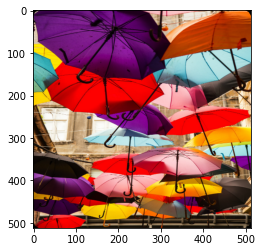

In [6]:
#displaying image
plt.imshow(image_umbrella)
plt.show()

In [7]:
# creating a function that find image size
def image_byte_size(img):
    img_file = BytesIO()
    image = Image.fromarray(np.uint8(img))
    image.save(img_file, 'png')
    return img_file.tell()/1024

In [8]:
#Total number of bytes
image_byte_size(image_umbrella)

409.736328125

In [9]:
#Total unique colors in image
np.unique(image_umbrella.reshape(-1, image_umbrella.shape[2]), axis=0).shape[0]

135560

In [10]:
# resizing image
image_umbrella = cv.resize(image_umbrella,(256,256))

In [11]:
#resized image shape
image_umbrella.shape

(256, 256, 3)

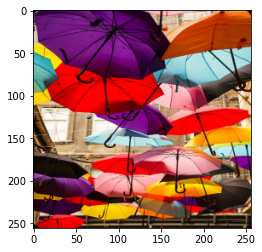

In [12]:
#displaying image
plt.imshow(image_umbrella)
plt.show()

In [13]:
#saved to local to use report (256x256)
# saved_img = cv.cvtColor(np.float32(image_umbrella), cv.COLOR_BGR2RGB)
# cv.imwrite("umbrella_256.png",saved_img)

In [14]:
#Total number of bytes
image_byte_size(image_umbrella)

116.84375

In [15]:
#Total unique colors in image
np.unique(image_umbrella.reshape(-1, image_umbrella.shape[2]), axis=0).shape[0]

45085

In [16]:
# Reshaping image (N x 3) that N = width x height
pixel_values_umbrella = image_umbrella.reshape((-1,3))
pixel_values_umbrella.shape

(65536, 3)

In [17]:
#converting to float type
pixel_values = np.float32(pixel_values_umbrella)

In [18]:
print(pixel_values.shape)

(65536, 3)


In [19]:
#create a function to calculate WCSS
def calculate_WCSS(data, labels, cluster_centers,K):
    wcss = []
    for k in range(K):
        index = (k == labels)
        centeroids = cluster_centers[k].reshape(-1,3)
        dist = np.sum((data[index] - centeroids)**2)
        #dist = np.linalg.norm(data[index] - centeroids[k]) 
        #print(str(data[index].shape))
        #print(cluster_centers[k].reshape(-1,3).shape)
        wcss.append(dist)
        #print("Centorids",centeroids)
        #print(np.unique(labels))
    return (np.sum(wcss))

In [20]:
 #create a function to calculate explained variance
def finding_explained_variance(wcss,bcss):
     return 100 * bcss / (wcss + bcss)
    

In [21]:
#create a function to calculate BCSS
def calculate_BCSS(data, kmeans):
    _, label_count = np.unique(kmeans.labels_, return_counts = True)
    dist = np.linalg.norm(kmeans.cluster_centers_ - np.mean(data, axis = 0), axis = 1)**2
    return sum(label_count * dist)

In [22]:
# Finding all sse(wcss) , bcss, explained variance
sse = []
my_wcss_umbrella = []
my_bcss_umbrella = []
my_exp_var_umbrella = []
for i in range(1,9):
    kmeans = KMeans(n_clusters=2 ** i, init="k-means++",n_init=5,max_iter=200,random_state=42)
    kmeans.fit(pixel_values_umbrella)
    my_values_wcss = calculate_WCSS(pixel_values_umbrella,kmeans.labels_,kmeans.cluster_centers_,2 ** i)
    my_values_bcss = calculate_BCSS(pixel_values_umbrella,kmeans)
    print("WCSS -> K = 2^" + str(i) + " : " + str(my_values_wcss))
    print("BCSS -> K = 2^" + str(i) + " : " + str(my_values_bcss))
    print("Explained Varaince -> K = 2^"+str(i)+" : "+str(finding_explained_variance(my_values_wcss,my_values_bcss)) + "%")
    print("********************************")
    my_wcss_umbrella.append(my_values_wcss)
    my_bcss_umbrella.append(my_values_bcss)
    my_exp_var_umbrella.append(str(finding_explained_variance(my_values_wcss,my_values_bcss)) + "%")
    #print(np.unique(kmeans.labels_))
    sse.append(kmeans.inertia_)
print("SSE:",sse)

WCSS -> K = 2^1 : 594602940.9851665
BCSS -> K = 2^1 : 607210770.1633956
Explained Varaince -> K = 2^1 : 50.52453342232965%
********************************
WCSS -> K = 2^2 : 278986162.244629
BCSS -> K = 2^2 : 923012472.9613136
Explained Varaince -> K = 2^2 : 76.7898103980102%
********************************
WCSS -> K = 2^3 : 117143068.59713672
BCSS -> K = 2^3 : 1085065100.3398607
Explained Varaince -> K = 2^3 : 90.25600793407388%
********************************
WCSS -> K = 2^4 : 52734215.89479223
BCSS -> K = 2^4 : 1148624915.5768688
Explained Varaince -> K = 2^4 : 95.6104536509251%
********************************
WCSS -> K = 2^5 : 26924562.716894127
BCSS -> K = 2^5 : 1174031739.3298264
Explained Varaince -> K = 2^5 : 97.75807307301622%
********************************
WCSS -> K = 2^6 : 14000549.841696788
BCSS -> K = 2^6 : 1186962622.9284012
Explained Varaince -> K = 2^6 : 98.83422321690318%
********************************
WCSS -> K = 2^7 : 7533570.068885077
BCSS -> K = 2^7 : 119362

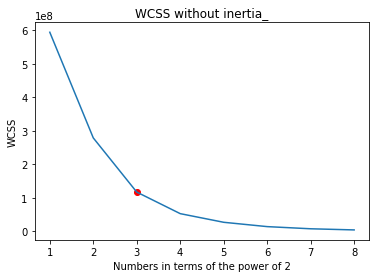

In [23]:
#plotting sse to find elbow point
plt.title("WCSS without inertia_")
plt.plot(range(1,9), my_wcss_umbrella)
plt.scatter(3,my_wcss_umbrella[2],c="red")
plt.xlabel("Numbers in terms of the power of 2")
plt.ylabel("WCSS")
plt.show()

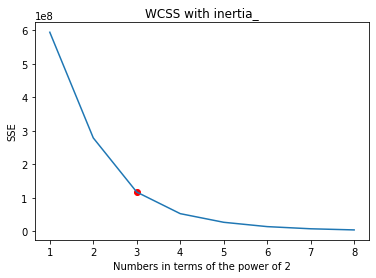

In [24]:
#plotting sse to find elbow point
plt.title("WCSS with inertia_")
plt.plot(range(1,9), sse)
plt.scatter(3,my_wcss_umbrella[2],c="red")
plt.xlabel("Numbers in terms of the power of 2")
plt.ylabel("SSE")
plt.show()

In [25]:
#finding elbow point manually
def finding_elbow_point(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) 

In [26]:
#testing the function
finding_elbow_point(sse)

3

In [27]:
#since webcolor liblary can't find some rgb colors so that this function finds closest color
def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

K=2^1 -> ['brown', 'tan']
K=2^2 -> ['darkslategray', 'silver', 'peru', 'red']
K=2^3 -> ['black', 'purple', 'dimgray', 'firebrick', 'lightgray', 'tan', 'red', 'orange']
K=2^4 -> ['black', 'black', 'indigo', 'cadetblue', 'darkolivegreen', 'purple', 'indianred', 'darkred', 'lightblue', 'firebrick', 'darksalmon', 'chocolate', 'lightpink', 'antiquewhite', 'red', 'gold']
K=2^5 -> ['black', 'black', 'black', 'cadetblue', 'darkslategray', 'indigo', 'darkolivegreen', 'purple', 'darkolivegreen', 'cadetblue', 'maroon', 'darkmagenta', 'gray', 'lightblue', 'saddlebrown', 'brown', 'palevioletred', 'powderblue', 'darkgoldenrod', 'darkkhaki', 'firebrick', 'firebrick', 'tan', 'indianred', 'sandybrown', 'darksalmon', 'linen', 'darkorange', 'pink', 'red', 'orange', 'gold']
K=2^6 -> ['black', 'black', 'black', 'midnightblue', 'darkslategray', 'darkslategray', 'steelblue', 'black', 'lightseagreen', 'maroon', 'indigo', 'darkolivegreen', 'indigo', 'dimgray', 'darkolivegreen', 'purple', 'maroon', 'mediumaquam

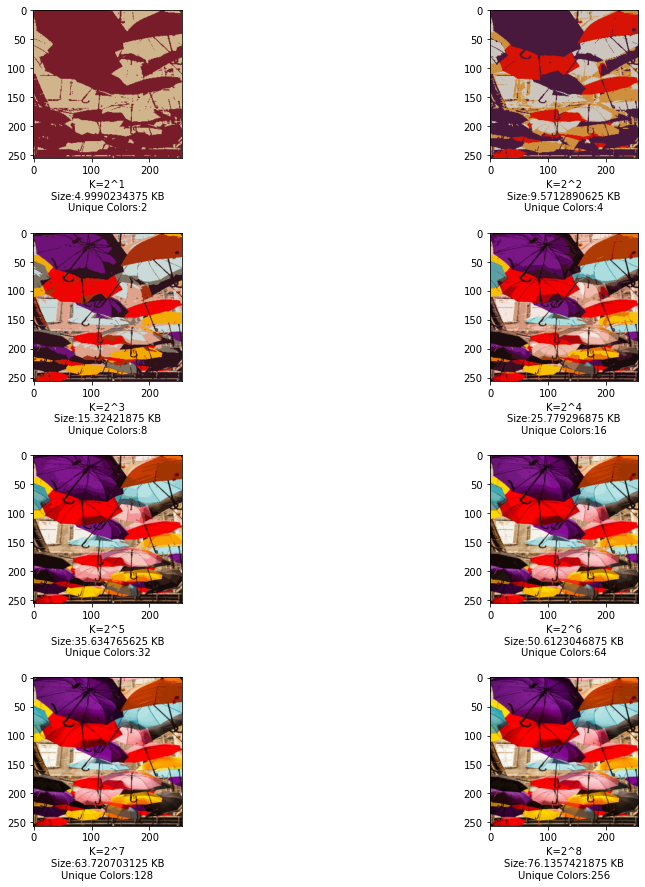

In [28]:
# displaying all different compressed image with total number of bytes and unique colors also color names in related cluster
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=.5)
my_size_img_umbrella = []
my_color_img_umbrella = []
my_color_name_umbrella = []
for i in range(1,9):
    colors=[]
    kmeans = KMeans(n_clusters=2**i, n_init=5, max_iter=200,random_state=42)
    kmeans.fit(pixel_values_umbrella)
    pixel_centroid = np.array([list(kmeans.cluster_centers_[label]) for label in kmeans.labels_])
    for color in (np.unique(pixel_centroid.reshape(-1, image_umbrella.shape[2]),axis = 0)):
        color = color.astype(int)
        try:
            closest_name = webcolors.rgb_to_name(color)
        except ValueError:
            closest_name = closest_colour(color)
        colors.append(closest_name)
    pixel_centroid = pixel_centroid.astype("uint8")
    pixel_centroids_reshaped = np.reshape(pixel_centroid, (image_umbrella.shape[0], image_umbrella.shape[1], 3), "C")
    compressed_im = Image.fromarray(pixel_centroids_reshaped)
    plt.subplot(4,2,i)
    saved_img = cv.cvtColor(np.float32(compressed_im), cv.COLOR_BGR2RGB)
    #cv.imwrite("umbrella"+str(i)+".png",saved_img)
    plt.imshow(compressed_im)
    plt.xlabel("K=2^"+str(i)+"\nSize:"+str(image_byte_size(compressed_im))+" KB"+"\n"+"Unique Colors:"+str(np.unique(pixel_centroid.reshape(-1, image_umbrella.shape[2]), axis=0).shape[0]))
    print("K=2^"+str(i)+" -> "+str(colors))
    my_size_img_umbrella.append(str(image_byte_size(compressed_im))+" KB")
    my_color_img_umbrella.append(np.unique(pixel_centroid.reshape(-1, image_umbrella.shape[2]), axis=0).shape[0])
    my_color_name_umbrella.append(colors[:10])
plt.show()


In [29]:
# creating a table that includes several data about image
umbrella_table = pd.DataFrame(index=["WCSS","BCSS","Explained Varaince","Image Size","Unique Colors","Name of the colors"],
                             data = [my_wcss_umbrella,
                                     my_bcss_umbrella,
                                     my_exp_var_umbrella,
                                     my_size_img_umbrella,
                                     my_color_img_umbrella,
                                     my_color_name_umbrella],
                             columns=["K=2^"+str(i) for i in range(1,9)])

In [30]:
umbrella_table

,K=2^1,K=2^2,K=2^3,K=2^4,K=2^5,K=2^6,K=2^7,K=2^8
WCSS,5.94603e+08,2.78986e+08,1.17143e+08,5.27342e+07,2.69246e+07,1.40005e+07,7.53357e+06,4.14667e+06
BCSS,6.07211e+08,9.23012e+08,1.08507e+09,1.14862e+09,1.17403e+09,1.18696e+09,1.19363e+09,1.19689e+09
Explained Varaince,50.52453342232965%,76.7898103980102%,90.25600793407388%,95.6104536509251%,97.75807307301622%,98.83422321690318%,99.37280924305593%,99.65474362919592%
Image Size,4.9990234375 KB,9.5712890625 KB,15.32421875 KB,25.779296875 KB,35.634765625 KB,50.6123046875 KB,63.720703125 KB,76.1357421875 KB
Unique Colors,2,4,8,16,32,64,128,256
Name of the colors,"[brown, tan]","[darkslategray, silver, peru, red]","[black, purple, dimgray, firebrick, lightgray,...","[black, black, indigo, cadetblue, darkolivegre...","[black, black, black, cadetblue, darkslategray...","[black, black, black, midnightblue, darkslateg...","[black, black, black, black, black, black, dar...","[black, black, black, black, black, black, bla..."


In [31]:
#umbrella_table.to_excel("umbrella_table.xlsx")

In [32]:
#reading peppers image
image_peppers = cv.imread("peppers.png")

In [33]:
#converting RGB colors
image_peppers = cv.cvtColor(image_peppers,cv.COLOR_BGR2RGB)

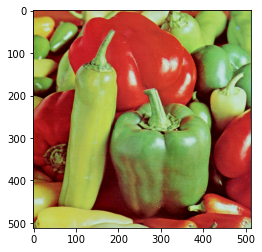

In [34]:
#displaying image
plt.imshow(image_peppers)
plt.show()

In [35]:
#Total number of bytes
image_byte_size(image_peppers)

504.8369140625

In [36]:
#Total unique colors in image
np.unique(image_peppers.reshape(-1, image_peppers.shape[2]), axis=0).shape[0]

183525

In [37]:
# resizing image
image_peppers = cv.resize(image_peppers,(256,256))

In [38]:
#resized image shape
image_peppers.shape

(256, 256, 3)

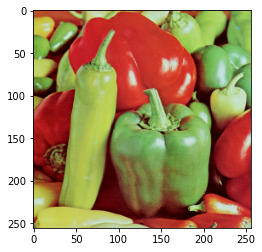

In [39]:
#displaying image
plt.imshow(image_peppers)
plt.show()

In [40]:
#saved to local to use report (256x256)
# saved_img = cv.cvtColor(np.float32(image_peppers), cv.COLOR_BGR2RGB)
# cv.imwrite("peppers_256.png",saved_img)

In [41]:
#Total number of bytes
image_byte_size(image_peppers)

115.2275390625

In [42]:
#Total unique colors in image
np.unique(image_peppers.reshape(-1, image_peppers.shape[2]), axis=0).shape[0]

54108

In [43]:
# Reshaping image (N x 3) that N = width x height
pixel_values_peppers = image_peppers.reshape((-1,3))
pixel_values_peppers.shape

(65536, 3)

In [44]:
#converting to float type
pixel_values = np.float32(pixel_values_peppers)

In [45]:
print(pixel_values.shape)

(65536, 3)


In [46]:
# Finding all sse(wcss) , bcss, explained variance
sse = []
my_wcss_peppers = []
my_bcss_peppers = []
my_exp_var_peppers = []
for i in range(1,9):
    kmeans = KMeans(n_clusters=2 ** i, init="k-means++",n_init=5,max_iter=200,random_state=42)
    kmeans.fit(pixel_values_peppers)
    sse.append(kmeans.inertia_)
    my_values_wcss = calculate_WCSS(pixel_values_peppers,kmeans.labels_,kmeans.cluster_centers_,2 ** i)
    my_values_bcss = calculate_BCSS(pixel_values_peppers,kmeans)
    print("WCSS -> K = 2^" + str(i) + " : " + str(my_values_wcss))
    print("BCSS -> K = 2^" + str(i) + " : " + str(my_values_bcss))
    print("Expalined Varaince -> K = 2^"+str(i)+" : "+str(finding_explained_variance(my_values_wcss,my_values_bcss)) + "%")
    print("********************************")
    my_wcss_peppers.append(my_values_wcss)
    my_bcss_peppers.append(my_values_bcss)
    my_exp_var_peppers.append(str(finding_explained_variance(my_values_wcss,my_values_bcss)) + "%")
print("SSE:",sse)

WCSS -> K = 2^1 : 237842007.81890488
BCSS -> K = 2^1 : 377487947.204404
Expalined Varaince -> K = 2^1 : 61.347240472000856%
********************************
WCSS -> K = 2^2 : 104997944.91995227
BCSS -> K = 2^2 : 510871030.6089808
Expalined Varaince -> K = 2^2 : 82.95125276772129%
********************************
WCSS -> K = 2^3 : 44354479.83498374
BCSS -> K = 2^3 : 571463696.9290712
Expalined Varaince -> K = 2^3 : 92.79747147639364%
********************************
WCSS -> K = 2^4 : 23801876.738675952
BCSS -> K = 2^4 : 591095104.2951243
Expalined Varaince -> K = 2^4 : 96.12912772824825%
********************************
WCSS -> K = 2^5 : 13704836.31761714
BCSS -> K = 2^5 : 601940811.2980497
Expalined Varaince -> K = 2^5 : 97.77390835609825%
********************************
WCSS -> K = 2^6 : 7726252.0088461265
BCSS -> K = 2^6 : 607621483.4416444
Expalined Varaince -> K = 2^6 : 98.74440880111636%
********************************
WCSS -> K = 2^7 : 4534550.038837994
BCSS -> K = 2^7 : 610866

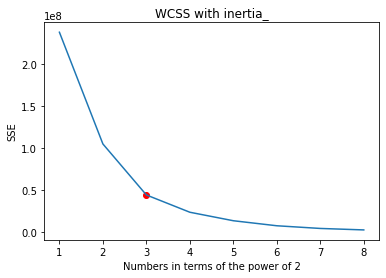

In [47]:
#plotting sse to find elbow point
plt.title("WCSS with inertia_")
plt.plot(range(1,9), sse)
plt.xlabel("Numbers in terms of the power of 2")
plt.scatter(3,my_wcss_peppers[2],c="red")
plt.ylabel("SSE")
plt.show()

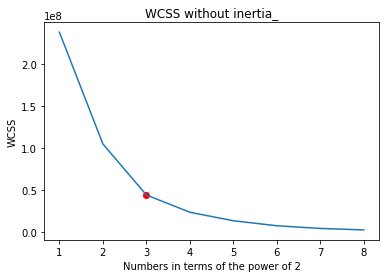

In [48]:
#plotting sse to find elbow point
plt.title("WCSS without inertia_")
plt.plot(range(1,9), my_wcss_peppers)
plt.xlabel("Numbers in terms of the power of 2")
plt.scatter(3,my_wcss_peppers[2],c="red")
plt.ylabel("WCSS")
plt.show()

In [49]:
#testing the function
finding_elbow_point(sse)

3

K=2^1 -> ['brown', 'darkkhaki']
K=2^2 -> ['maroon', 'olivedrab', 'darkkhaki', 'firebrick']
K=2^3 -> ['black', 'darkolivegreen', 'olivedrab', 'yellowgreen', 'brown', 'darkkhaki', 'silver', 'firebrick']
K=2^4 -> ['black', 'maroon', 'saddlebrown', 'olivedrab', 'darkolivegreen', 'olivedrab', 'darkseagreen', 'darkred', 'yellowgreen', 'darkseagreen', 'firebrick', 'darkkhaki', 'silver', 'indianred', 'rosybrown', 'firebrick']
K=2^5 -> ['black', 'black', 'maroon', 'darkolivegreen', 'saddlebrown', 'olivedrab', 'darkolivegreen', 'gray', 'maroon', 'olivedrab', 'yellowgreen', 'saddlebrown', 'darkseagreen', 'olivedrab', 'brown', 'darkseagreen', 'yellowgreen', 'gray', 'darkkhaki', 'brown', 'sienna', 'darkkhaki', 'peru', 'darkkhaki', 'silver', 'firebrick', 'darkkhaki', 'lightgray', 'firebrick', 'tan', 'indianred', 'indianred']
K=2^6 -> ['black', 'black', 'maroon', 'maroon', 'darkolivegreen', 'darkolivegreen', 'maroon', 'olivedrab', 'olivedrab', 'maroon', 'dimgray', 'saddlebrown', 'mediumseagreen', 'gr

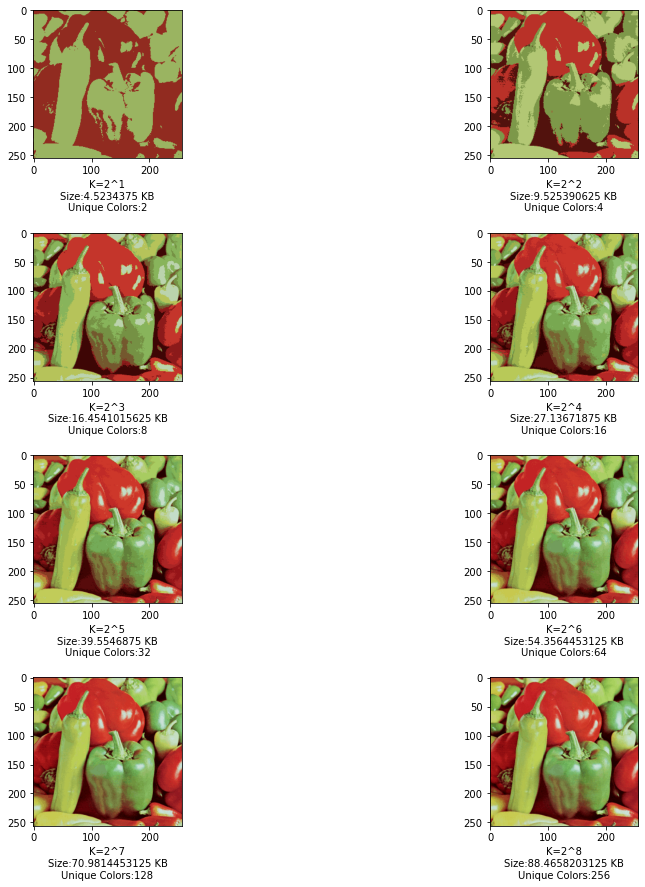

In [50]:
# displaying all different compressed image with total number of bytes and unique colors also color names in related cluster
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=.5)
my_size_img_peppers = []
my_color_img_peppers = []
my_color_name_peppers = []

for i in range(1,9):
    colors=[]
    kmeans = KMeans(n_clusters=2**i, n_init=5, max_iter=200,random_state=42)
    kmeans.fit(pixel_values_peppers)
    pixel_centroid = np.array([list(kmeans.cluster_centers_[label]) for label in kmeans.labels_])
    for color in (np.unique(pixel_centroid.reshape(-1, image_peppers.shape[2]),axis = 0)):
        color = color.astype(int)
        try:
            closest_name = webcolors.rgb_to_name(color)
        except ValueError:
            closest_name = closest_colour(color)
        colors.append(closest_name)
    pixel_centroid = pixel_centroid.astype("uint8")
    pixel_centroids_reshaped = np.reshape(pixel_centroid, (image_peppers.shape[0], image_peppers.shape[1], 3), "C")
    compressed_im = Image.fromarray(pixel_centroids_reshaped)
    plt.subplot(4,2,i)
    saved_img = cv.cvtColor(np.float32(compressed_im), cv.COLOR_BGR2RGB)
    #cv.imwrite("peppers"+str(i)+".png",saved_img)
    plt.imshow(compressed_im)
    plt.xlabel("K=2^"+str(i)+"\nSize:"+str(image_byte_size(saved_img))+" KB"+"\n"+"Unique Colors:"+str(np.unique(pixel_centroid.reshape(-1, image_peppers.shape[2]), axis=0).shape[0]))
    print("K=2^"+str(i)+" -> "+str(colors))
    my_size_img_peppers.append(str(image_byte_size(compressed_im))+" KB")
    my_color_img_peppers.append(np.unique(pixel_centroid.reshape(-1, image_peppers.shape[2]), axis=0).shape[0])
    my_color_name_peppers.append(colors[:10])
plt.show()


In [51]:
# creating a table that includes several data about image
peppers_table = pd.DataFrame(index=["WCSS","BCSS","Explained Varaince","Image Size","Unique Colors","Name of the colors"],
                             data = [my_wcss_peppers,
                                     my_bcss_peppers,
                                     my_exp_var_peppers,
                                     my_size_img_peppers,
                                     my_color_img_peppers,
                                     my_color_name_peppers],
                             columns=["K=2^"+str(i) for i in range(1,9)])

In [52]:
peppers_table

,K=2^1,K=2^2,K=2^3,K=2^4,K=2^5,K=2^6,K=2^7,K=2^8
WCSS,2.37842e+08,1.04998e+08,4.43545e+07,2.38019e+07,1.37048e+07,7.72625e+06,4.53455e+06,2.78584e+06
BCSS,3.77488e+08,5.10871e+08,5.71464e+08,5.91095e+08,6.01941e+08,6.07621e+08,6.10866e+08,6.12611e+08
Explained Varaince,61.347240472000856%,82.95125276772129%,92.79747147639364%,96.12912772824825%,97.77390835609825%,98.74440880111636%,99.2631549495544%,99.54730946099805%
Image Size,4.5234375 KB,9.5107421875 KB,16.4072265625 KB,27.0859375 KB,39.40625 KB,54.1484375 KB,70.767578125 KB,88.3564453125 KB
Unique Colors,2,4,8,16,32,64,128,256
Name of the colors,"[brown, darkkhaki]","[maroon, olivedrab, darkkhaki, firebrick]","[black, darkolivegreen, olivedrab, yellowgreen...","[black, maroon, saddlebrown, olivedrab, darkol...","[black, black, maroon, darkolivegreen, saddleb...","[black, black, maroon, maroon, darkolivegreen,...","[black, black, black, black, maroon, maroon, m...","[black, black, black, black, black, black, mar..."


In [53]:
#Converting data frame to excel file
#peppers_table.to_excel("peppers_table.xlsx")

In [54]:
#reading lenna image
image_lenna = cv.imread("lenna.png")

In [55]:
#converting RGB colors
image_lenna = cv.cvtColor(image_lenna,cv.COLOR_BGR2RGB)

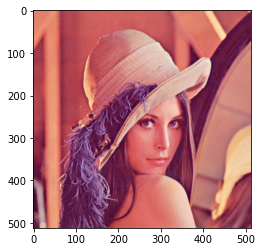

In [56]:
#displaying image
plt.imshow(image_lenna)
plt.show()

In [57]:
#Total number of bytes
image_byte_size(image_lenna)

468.533203125

In [58]:
#Total unique colors in image
np.unique(image_lenna.reshape(-1, image_lenna.shape[2]), axis=0).shape[0]

148279

In [59]:
# resizing image
image_lenna = cv.resize(image_lenna,(256,256))

In [60]:
#resized image shape
image_lenna.shape

(256, 256, 3)

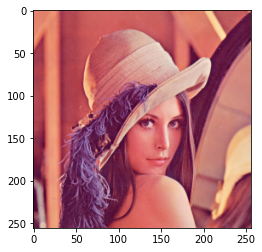

In [61]:
#displaying image
plt.imshow(image_lenna)
plt.show()

In [62]:
#saved to local to use report (256x256)
# saved_img = cv.cvtColor(np.float32(image_lenna), cv.COLOR_BGR2RGB)
# cv.imwrite("lenna_256.png",saved_img)

In [63]:
#Total number of bytes
image_byte_size(image_lenna)

116.361328125

In [64]:
#Total unique colors in image
np.unique(image_lenna.reshape(-1, image_lenna.shape[2]), axis=0).shape[0]

48331

In [65]:
# Reshaping image (N x 3) that N = width x height
pixel_values_lenna = image_lenna.reshape((-1,3))
pixel_values_lenna.shape

(65536, 3)

In [66]:
#converting to float type
pixel_values = np.float32(pixel_values_lenna)

In [67]:
pixel_values.shape

(65536, 3)

In [68]:
# Finding all sse(wcss) , bcss, explained variance
my_wcss_lenna = []
sse = []
my_bcss_lenna = []
my_exp_var_lenna = []
for i in range(1,9):
    kmeans = KMeans(n_clusters=2 ** i, init="k-means++",n_init=5,max_iter=200,random_state=42)
    kmeans.fit(pixel_values_lenna)
    sse.append(kmeans.inertia_)
    my_values_wcss = calculate_WCSS(pixel_values_lenna,kmeans.labels_,kmeans.cluster_centers_,2 ** i)
    my_values_bcss = calculate_BCSS(pixel_values_lenna,kmeans)
    print("WCSS -> K = 2^" + str(i) + " : " + str(my_values_wcss))
    print("BCSS -> K = 2^" + str(i) + " : " + str(my_values_bcss))
    print("Explained Varaince -> K = 2^"+str(i)+" : "+str(finding_explained_variance(my_values_wcss,my_values_bcss)) + "%")
    print("********************************")
    my_wcss_lenna.append(my_values_wcss)
    my_bcss_lenna.append(my_values_bcss)
    my_exp_var_lenna.append(str(finding_explained_variance(my_values_wcss,my_values_bcss)) + "%")
print("SSE:",sse)

WCSS -> K = 2^1 : 146949963.09271902
BCSS -> K = 2^1 : 260339799.74659637
Explained Varaince -> K = 2^1 : 63.920045014562774%
********************************
WCSS -> K = 2^2 : 51533585.44981105
BCSS -> K = 2^2 : 356215045.7148217
Explained Varaince -> K = 2^2 : 87.3614326300451%
********************************
WCSS -> K = 2^3 : 24531179.45601039
BCSS -> K = 2^3 : 382941577.4876385
Explained Varaince -> K = 2^3 : 93.97967617761427%
********************************
WCSS -> K = 2^4 : 12295891.192870386
BCSS -> K = 2^4 : 394422557.77867293
Explained Varaince -> K = 2^4 : 96.9768051525662%
********************************
WCSS -> K = 2^5 : 6604994.110815963
BCSS -> K = 2^5 : 400414605.8197871
Explained Varaince -> K = 2^5 : 98.37722947201017%
********************************
WCSS -> K = 2^6 : 3848580.7083881255
BCSS -> K = 2^6 : 403170043.44502544
Explained Varaince -> K = 2^6 : 99.05444604251389%
********************************
WCSS -> K = 2^7 : 2380940.2632814986
BCSS -> K = 2^7 : 4046

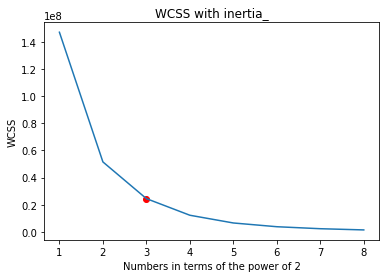

In [69]:
#plotting sse to find elbow point
plt.title("WCSS with inertia_")
plt.plot(range(1,9), sse)
plt.scatter(3,my_wcss_lenna[2],c="red")
plt.xlabel("Numbers in terms of the power of 2")
plt.ylabel("WCSS")
plt.show()

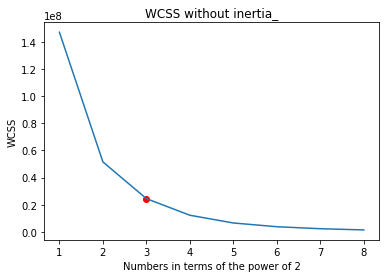

In [70]:
#plotting sse to find elbow point
plt.title("WCSS without inertia_")
plt.plot(range(1,9), my_wcss_lenna)
plt.scatter(3,my_wcss_lenna[2],c="red")
plt.xlabel("Numbers in terms of the power of 2")
plt.ylabel("WCSS")
plt.show()

In [71]:
#testing the function
finding_elbow_point(sse)

3

K=2^1 -> ['brown', 'darksalmon']
K=2^2 -> ['brown', 'indianred', 'lightcoral', 'burlywood']
K=2^3 -> ['indigo', 'brown', 'gray', 'sienna', 'indianred', 'lightcoral', 'darksalmon', 'wheat']
K=2^4 -> ['indigo', 'brown', 'dimgray', 'brown', 'gray', 'indianred', 'sienna', 'rosybrown', 'indianred', 'rosybrown', 'indianred', 'tan', 'lightcoral', 'wheat', 'darksalmon', 'burlywood']
K=2^5 -> ['indigo', 'indigo', 'brown', 'purple', 'brown', 'dimgray', 'dimgray', 'brown', 'gray', 'sienna', 'brown', 'rosybrown', 'indianred', 'sienna', 'indianred', 'indianred', 'rosybrown', 'rosybrown', 'indianred', 'indianred', 'rosybrown', 'indianred', 'tan', 'lightcoral', 'darksalmon', 'indianred', 'tan', 'darksalmon', 'wheat', 'darksalmon', 'burlywood', 'navajowhite']
K=2^6 -> ['indigo', 'indigo', 'indigo', 'maroon', 'indigo', 'brown', 'purple', 'brown', 'dimgray', 'dimgray', 'brown', 'brown', 'dimgray', 'gray', 'sienna', 'brown', 'sienna', 'gray', 'lightslategray', 'brown', 'indianred', 'indianred', 'sienna',

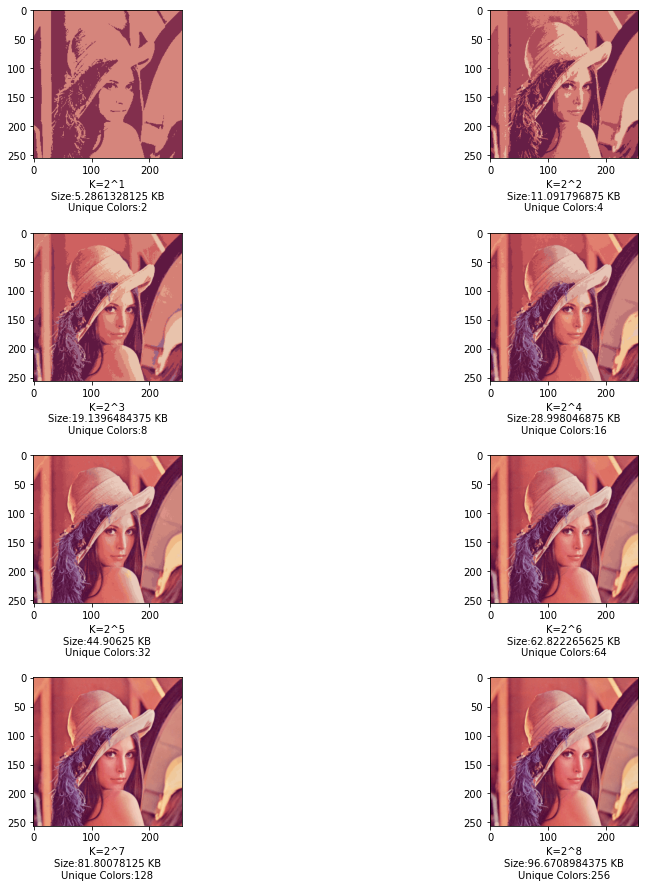

In [72]:
# displaying all different compressed image with total number of bytes and unique colors also color names in related cluster
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=.5)
my_size_img_lenna = []
my_color_img_lenna = []
my_color_name_lenna = []


for i in range(1,9):
    colors=[]
    kmeans = KMeans(n_clusters=2**i, n_init=5, max_iter=200,random_state=42)
    kmeans.fit(pixel_values_lenna)
    pixel_centroid = np.array([list(kmeans.cluster_centers_[label]) for label in kmeans.labels_])
    for color in (np.unique(pixel_centroid.reshape(-1, image_lenna.shape[2]),axis = 0)):
        color = color.astype(int)
        try:
            closest_name = webcolors.rgb_to_name(color)
        except ValueError:
            closest_name = closest_colour(color)
        colors.append(closest_name)
    pixel_centroid = pixel_centroid.astype("uint8")
    pixel_centroids_reshaped = np.reshape(pixel_centroid, (image_lenna.shape[0], image_lenna.shape[1], 3), "C")
    compressed_im = Image.fromarray(pixel_centroids_reshaped)
    plt.subplot(4,2,i)
    saved_img = cv.cvtColor(np.float32(compressed_im), cv.COLOR_BGR2RGB)
    #cv.imwrite("lenna"+str(i)+".png",saved_img)
    plt.imshow(compressed_im)
    plt.xlabel("K=2^"+str(i)+"\nSize:"+str(image_byte_size(compressed_im))+" KB"+"\n"+"Unique Colors:"+str(np.unique(pixel_centroid.reshape(-1, image_lenna.shape[2]), axis=0).shape[0]))
    my_size_img_lenna.append(str(image_byte_size(compressed_im))+" KB")
    my_color_img_lenna.append(np.unique(pixel_centroid.reshape(-1, image_lenna.shape[2]), axis=0).shape[0])
    my_color_name_lenna.append(colors[:10])
    print("K=2^"+str(i)+" -> "+str(colors))
plt.show()

In [73]:
# creating a table that includes several data about image
lenna_table = pd.DataFrame(index=["WCSS","BCSS","Explained Varaince","Image Size","Unique Colors","Name of the colors"],
                             data = [my_wcss_lenna,
                                     my_bcss_lenna,
                                     my_exp_var_lenna,
                                     my_size_img_lenna,
                                     my_color_img_lenna,
                                     my_color_name_lenna],
                             columns=["K=2^"+str(i) for i in range(1,9)])

In [74]:
lenna_table

,K=2^1,K=2^2,K=2^3,K=2^4,K=2^5,K=2^6,K=2^7,K=2^8
WCSS,1.4695e+08,5.15336e+07,2.45312e+07,1.22959e+07,6.60499e+06,3.84858e+06,2.38094e+06,1.4971e+06
BCSS,2.6034e+08,3.56215e+08,3.82942e+08,3.94423e+08,4.00415e+08,4.0317e+08,4.04685e+08,4.05599e+08
Explained Varaince,63.920045014562774%,87.3614326300451%,93.97967617761427%,96.9768051525662%,98.37722947201017%,99.05444604251389%,99.41509673318966%,99.63224884082197%
Image Size,5.2861328125 KB,11.091796875 KB,19.1396484375 KB,28.998046875 KB,44.90625 KB,62.822265625 KB,81.80078125 KB,96.6708984375 KB
Unique Colors,2,4,8,16,32,64,128,256
Name of the colors,"[brown, darksalmon]","[brown, indianred, lightcoral, burlywood]","[indigo, brown, gray, sienna, indianred, light...","[indigo, brown, dimgray, brown, gray, indianre...","[indigo, indigo, brown, purple, brown, dimgray...","[indigo, indigo, indigo, maroon, indigo, brown...","[indigo, indigo, indigo, indigo, indigo, maroo...","[midnightblue, indigo, indigo, indigo, maroon,..."


In [75]:
#Converting data frame to excel file
#lenna_table.to_excel("lenna_table.xlsx")

In [76]:
#reading landscape image
image_landscape = cv.imread("landscape.jpg")

In [77]:
#converting RGB colors
image_landscape = cv.cvtColor(image_landscape,cv.COLOR_BGR2RGB)

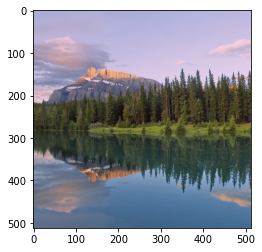

In [78]:
#displaying image
plt.imshow(image_landscape)
plt.show()

In [79]:
#Total number of bytes
image_byte_size(image_landscape)

315.89453125

In [80]:
#Total unique colors in image
np.unique(image_landscape.reshape(-1, image_landscape.shape[2]), axis=0).shape[0]

58694

In [81]:
# resizing image
image_landscape = cv.resize(image_landscape,(256,256))

In [82]:
#resized image shape
image_landscape.shape

(256, 256, 3)

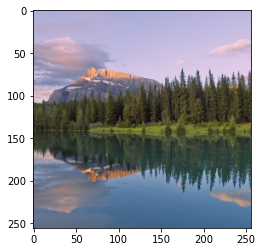

In [83]:
#displaying image
plt.imshow(image_landscape)
plt.show()

In [84]:
#saved to local to use report (256x256)
# saved_img = cv.cvtColor(np.float32(image_landscape), cv.COLOR_BGR2RGB)
# cv.imwrite("landscape_256.png",saved_img)

In [85]:
#Total number of bytes
image_byte_size(image_landscape)

93.6806640625

In [86]:
#Total unique colors in image
np.unique(image_landscape.reshape(-1, image_landscape.shape[2]), axis=0).shape[0]

34973

In [87]:
# Reshaping image (N x 3) that N = width x height
pixel_values_landscape = image_landscape.reshape((-1,3))
pixel_values_landscape.shape

(65536, 3)

In [88]:
#converting to float type
pixel_values = np.float32(pixel_values_landscape)

In [89]:
pixel_values.shape

(65536, 3)

In [90]:
# Finding all sse(wcss) , bcss, explained variance
my_wcss_landscape = []
sse = []
my_bcss_landscape = []
my_exp_var_landscape = []
for i in range(1,9):
    kmeans = KMeans(n_clusters=2 ** i, init="k-means++",n_init=5,max_iter=200,random_state=42)
    kmeans.fit(pixel_values_landscape)
    sse.append(kmeans.inertia_)
    my_values_wcss = calculate_WCSS(pixel_values_landscape,kmeans.labels_,kmeans.cluster_centers_,2 ** i)
    my_values_bcss = calculate_BCSS(pixel_values_landscape,kmeans)
    print("WCSS -> K = 2^" + str(i) + " : " + str(my_values_wcss))
    print("BCSS -> K = 2^" + str(i) + " : " + str(my_values_bcss))
    print("Explained Varaince -> K = 2^"+str(i)+" : "+str(finding_explained_variance(my_values_wcss,my_values_bcss)) + "%")
    print("********************************")
    my_wcss_landscape.append(my_values_wcss)
    my_bcss_landscape.append(my_values_bcss)
    my_exp_var_landscape.append(str(finding_explained_variance(my_values_wcss,my_values_bcss)) + "%")
print("SSE:",sse)

WCSS -> K = 2^1 : 202408662.10225195
BCSS -> K = 2^1 : 528462342.9381874
Explained Varaince -> K = 2^1 : 72.30582952308355%
********************************
WCSS -> K = 2^2 : 60012488.64619252
BCSS -> K = 2^2 : 670970981.9760662
Explained Varaince -> K = 2^2 : 91.79017158963852%
********************************
WCSS -> K = 2^3 : 31006219.694983948
BCSS -> K = 2^3 : 700366710.3361051
Explained Varaince -> K = 2^3 : 95.76054589637792%
********************************
WCSS -> K = 2^4 : 14583567.742528925
BCSS -> K = 2^4 : 716860992.0958375
Explained Varaince -> K = 2^4 : 98.00619643056042%
********************************
WCSS -> K = 2^5 : 7401939.721086159
BCSS -> K = 2^5 : 724224490.1896433
Explained Varaince -> K = 2^5 : 98.98828973114198%
********************************
WCSS -> K = 2^6 : 3902170.1164537957
BCSS -> K = 2^6 : 727426751.1254559
Explained Varaince -> K = 2^6 : 99.46642748521046%
********************************
WCSS -> K = 2^7 : 2228675.6136610284
BCSS -> K = 2^7 : 72922

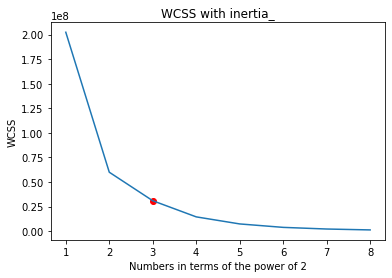

In [91]:
#plotting sse to find elbow point
plt.title("WCSS with inertia_")
plt.plot(range(1,9), sse)
plt.scatter(3,my_wcss_landscape[2],c="red")
plt.xlabel("Numbers in terms of the power of 2")
plt.ylabel("WCSS")
plt.show()

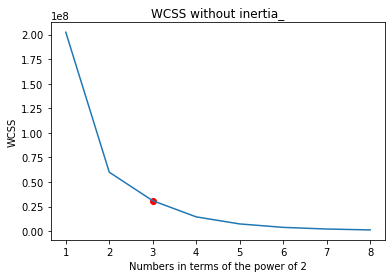

In [92]:
#plotting sse to find elbow point
plt.title("WCSS without inertia_")
plt.plot(range(1,9), my_wcss_landscape)
plt.scatter(3,my_wcss_landscape[2],c="red")
plt.xlabel("Numbers in terms of the power of 2")
plt.ylabel("WCSS")
plt.show()

In [93]:
#testing the function
finding_elbow_point(sse)

3

2^1 -> ['darkslategray', 'silver']
2^2 -> ['darkslategray', 'slategray', 'lightslategray', 'thistle']
2^3 -> ['darkslategray', 'darkslategray', 'slategray', 'darkolivegreen', 'lightslategray', 'darkgray', 'lightsteelblue', 'thistle']
2^4 -> ['black', 'darkslategray', 'darkslategray', 'steelblue', 'dimgray', 'darkolivegreen', 'slategray', 'slategray', 'darkolivegreen', 'lightslategray', 'gray', 'darkgray', 'lightsteelblue', 'thistle', 'darksalmon', 'thistle']
2^5 -> ['black', 'black', 'darkslategray', 'darkslategray', 'darkslategray', 'darkslategray', 'darkslategray', 'darkolivegreen', 'steelblue', 'dimgray', 'darkolivegreen', 'steelblue', 'darkolivegreen', 'slategray', 'darkolivegreen', 'dimgray', 'lightslategray', 'dimgray', 'gray', 'olivedrab', 'lightslategray', 'lightslategray', 'gray', 'darkgray', 'indianred', 'lightsteelblue', 'darkgray', 'lightsteelblue', 'thistle', 'silver', 'darksalmon', 'thistle']
2^6 -> ['black', 'darkslategray', 'black', 'darkslategray', 'darkslategray', 'da

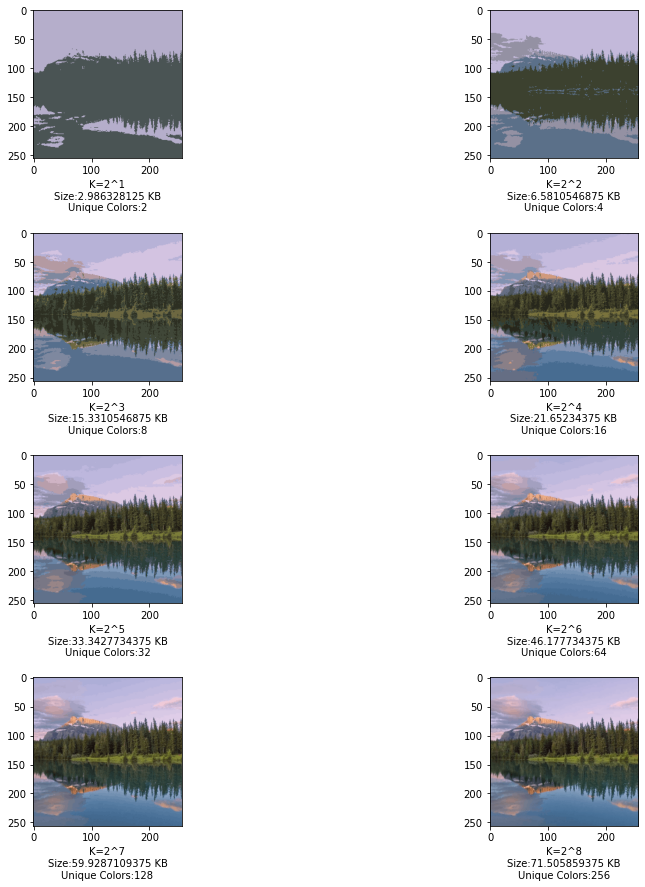

In [94]:
# displaying all different compressed image with total number of bytes and unique colors also color names in related cluster
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=.5)
my_size_img_landscape = []
my_color_img_landscape = []
my_color_name_landscape = []
for i in range(1,9):
    colors=[]
    kmeans = KMeans(n_clusters=2**i, n_init=5, max_iter=200,random_state=42)
    kmeans.fit(pixel_values_landscape)
    pixel_centroid = np.array([list(kmeans.cluster_centers_[label]) for label in kmeans.labels_])
    for color in (np.unique(pixel_centroid.reshape(-1, image_landscape.shape[2]),axis = 0)):
        color = color.astype(int)
        try:
            closest_name = webcolors.rgb_to_name(color)
        except ValueError:
            closest_name = closest_colour(color)
        colors.append(closest_name)
    pixel_centroid = pixel_centroid.astype("uint8")
    pixel_centroids_reshaped = np.reshape(pixel_centroid, (image_landscape.shape[0], image_landscape.shape[1], 3), "C")
    compressed_im = Image.fromarray(pixel_centroids_reshaped)
    plt.subplot(4,2,i)
    saved_img = cv.cvtColor(np.float32(compressed_im), cv.COLOR_BGR2RGB)
    #cv.imwrite("landscape"+str(i)+".png",saved_img)
    plt.imshow(compressed_im)
    plt.xlabel("K=2^"+str(i)+"\nSize:"+str(image_byte_size(compressed_im))+" KB"+"\n"+"Unique Colors:"+str(np.unique(pixel_centroid.reshape(-1, image_landscape.shape[2]), axis=0).shape[0]))
    print("2^"+str(i)+" -> "+str(colors))
    my_size_img_landscape.append(str(image_byte_size(compressed_im))+" KB")
    my_color_img_landscape.append(np.unique(pixel_centroid.reshape(-1, image_landscape.shape[2]), axis=0).shape[0])
    my_color_name_landscape.append(colors[:10])
plt.show()

In [95]:
# creating a table that includes several data about image
landscape_table = pd.DataFrame(index=["WCSS","BCSS","Explained Varaince","Image Size","Unique Colors","Name of the colors"],
                             data = [my_wcss_landscape,
                                     my_bcss_landscape,
                                     my_exp_var_landscape,
                                     my_size_img_landscape,
                                     my_color_img_landscape,
                                     my_color_name_landscape],
                             columns=["K=2^"+str(i) for i in range(1,9)])

In [96]:
landscape_table

,K=2^1,K=2^2,K=2^3,K=2^4,K=2^5,K=2^6,K=2^7,K=2^8
WCSS,2.02409e+08,6.00125e+07,3.10062e+07,1.45836e+07,7.40194e+06,3.90217e+06,2.22868e+06,1.31538e+06
BCSS,5.28462e+08,6.70971e+08,7.00367e+08,7.16861e+08,7.24224e+08,7.27427e+08,7.29222e+08,7.30036e+08
Explained Varaince,72.30582952308355%,91.79017158963852%,95.76054589637792%,98.00619643056042%,98.98828973114198%,99.46642748521046%,99.69530758543463%,99.820144231545%
Image Size,2.986328125 KB,6.5810546875 KB,15.3310546875 KB,21.65234375 KB,33.3427734375 KB,46.177734375 KB,59.9287109375 KB,71.505859375 KB
Unique Colors,2,4,8,16,32,64,128,256
Name of the colors,"[darkslategray, silver]","[darkslategray, slategray, lightslategray, thi...","[darkslategray, darkslategray, slategray, dark...","[black, darkslategray, darkslategray, steelblu...","[black, black, darkslategray, darkslategray, d...","[black, darkslategray, black, darkslategray, d...","[black, black, darkslategray, darkslategray, d...","[black, black, black, black, darkslategray, da..."


In [97]:
#Converting data frame to excel file
#landscape_table.to_excel("landscape_table.xlsx")

In [98]:
#reading baboon image
image_baboon = cv.imread("baboon.png")

In [99]:
#converting RGB colors
image_baboon = cv.cvtColor(image_baboon,cv.COLOR_BGR2RGB)

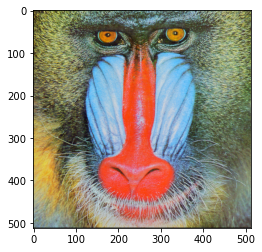

In [100]:
#displaying image
plt.imshow(image_baboon)
plt.show()

In [101]:
#Total number of bytes
image_byte_size(image_baboon)

617.94140625

In [102]:
#Total unique colors in image
np.unique(image_baboon.reshape(-1, image_baboon.shape[2]), axis=0).shape[0]

230427

In [103]:
# resizing image
image_baboon = cv.resize(image_baboon,(256,256))

In [104]:
#resized image shape
image_baboon.shape

(256, 256, 3)

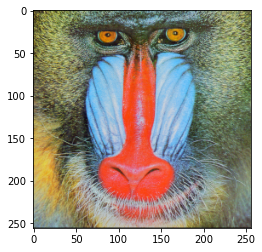

In [105]:
#displaying image
plt.imshow(image_baboon)
plt.show()

In [106]:
#saved to local to use report (256x256)
# saved_img = cv.cvtColor(np.float32(image_baboon), cv.COLOR_BGR2RGB)
# cv.imwrite("baboon_256.png",saved_img)

In [107]:
#Total number of bytes
image_byte_size(image_baboon)

152.5576171875

In [108]:
#Total unique colors in image
np.unique(image_baboon.reshape(-1, image_baboon.shape[2]), axis=0).shape[0]

62070

In [109]:
# Reshaping image (N x 3) that N = width x height
pixel_values_baboon = image_baboon.reshape((-1,3))
pixel_values_baboon.shape

(65536, 3)

In [110]:
#converting to float type
pixel_values = np.float32(pixel_values_baboon)

In [111]:
pixel_values.shape

(65536, 3)

In [112]:
# Finding all sse(wcss) , bcss, explained variance
my_wcss_baboon = []
sse = []
my_bcss_baboon = []
my_exp_var_baboon = []
for i in range(1,9):
    kmeans = KMeans(n_clusters=2 ** i, init="k-means++",n_init=5,max_iter=200,random_state=42)
    kmeans.fit(pixel_values_baboon)
    sse.append(kmeans.inertia_)
    my_values_wcss = calculate_WCSS(pixel_values_baboon,kmeans.labels_,kmeans.cluster_centers_,2 ** i)
    my_values_bcss = calculate_BCSS(pixel_values_baboon,kmeans)
    print("WCSS -> K = 2^" + str(i) + " : " + str(my_values_wcss))
    print("BCSS -> K = 2^" + str(i) + " : " + str(my_values_bcss))
    print("Explained Varaince -> K = 2^"+str(i)+" : "+str(finding_explained_variance(my_values_wcss,my_values_bcss)) + "%")
    print("********************************")
    my_wcss_baboon.append(my_values_wcss)
    my_bcss_baboon.append(my_values_bcss)
    my_exp_var_baboon.append(str(finding_explained_variance(my_values_wcss,my_values_bcss)) + "%")
print("SSE:",sse)

WCSS -> K = 2^1 : 303687881.95296705
BCSS -> K = 2^1 : 230212157.66322953
Explained Varaince -> K = 2^1 : 43.11896246134793%
********************************
WCSS -> K = 2^2 : 123337946.8656276
BCSS -> K = 2^2 : 410522835.4250945
Explained Varaince -> K = 2^2 : 76.89698307929612%
********************************
WCSS -> K = 2^3 : 63299174.596887685
BCSS -> K = 2^3 : 470983699.958055
Explained Varaince -> K = 2^3 : 88.15249793480358%
********************************
WCSS -> K = 2^4 : 34330089.28678654
BCSS -> K = 2^4 : 499957493.5744212
Explained Varaince -> K = 2^4 : 93.57460469080291%
********************************
WCSS -> K = 2^5 : 19397631.33121972
BCSS -> K = 2^5 : 515007597.82040006
Explained Varaince -> K = 2^5 : 96.3702392354929%
********************************
WCSS -> K = 2^6 : 11821690.40469458
BCSS -> K = 2^6 : 522350976.44851846
Explained Varaince -> K = 2^6 : 97.78691589101037%
********************************
WCSS -> K = 2^7 : 7452503.639333504
BCSS -> K = 2^7 : 5267906

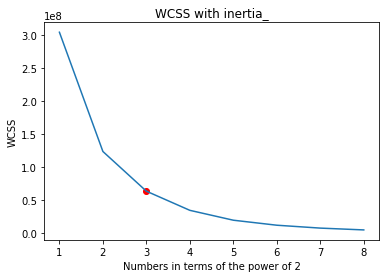

In [113]:
#plotting sse to find elbow point
plt.title("WCSS with inertia_")
plt.plot(range(1,9), sse)
plt.scatter(3,my_wcss_baboon[2],c="red")
plt.xlabel("Numbers in terms of the power of 2")
plt.ylabel("WCSS")
plt.show()

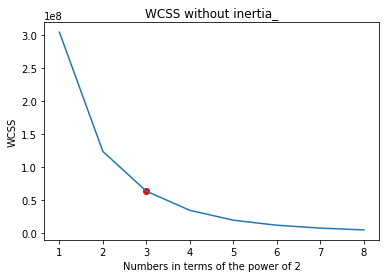

In [114]:
#plotting sse to find elbow point
plt.title("WCSS without inertia_")
plt.plot(range(1,9), my_wcss_baboon)
plt.scatter(3,my_wcss_baboon[2],c="red")
plt.xlabel("Numbers in terms of the power of 2")
plt.ylabel("WCSS")
plt.show()

In [115]:
#testing the function
finding_elbow_point(sse)

3

2^1 -> ['dimgray', 'darkgray']
2^2 -> ['darkolivegreen', 'gray', 'lightsteelblue', 'tomato']
2^3 -> ['darkslategray', 'dimgray', 'slategray', 'dimgray', 'skyblue', 'darkgray', 'darkkhaki', 'tomato']
2^4 -> ['darkslategray', 'darkolivegreen', 'dimgray', 'cadetblue', 'gray', 'skyblue', 'sienna', 'lightslategray', 'gray', 'lightsteelblue', 'darkkhaki', 'darkgray', 'peru', 'palevioletred', 'indianred', 'chocolate']
2^5 -> ['darkslategray', 'darkslategray', 'darkslategray', 'dimgray', 'steelblue', 'darkolivegreen', 'darkolivegreen', 'slategray', 'dimgray', 'cornflowerblue', 'skyblue', 'gray', 'lightslategray', 'darkolivegreen', 'gray', 'skyblue', 'darkgray', 'gray', 'darkkhaki', 'peru', 'darkgray', 'sienna', 'lightsteelblue', 'silver', 'darkkhaki', 'rosybrown', 'darkgoldenrod', 'darkkhaki', 'palevioletred', 'indianred', 'tomato', 'orangered']
2^6 -> ['black', 'darkslategray', 'darkslategray', 'darkslategray', 'darkslategray', 'dimgray', 'darkslategray', 'darkolivegreen', 'slategray', 'dimgr

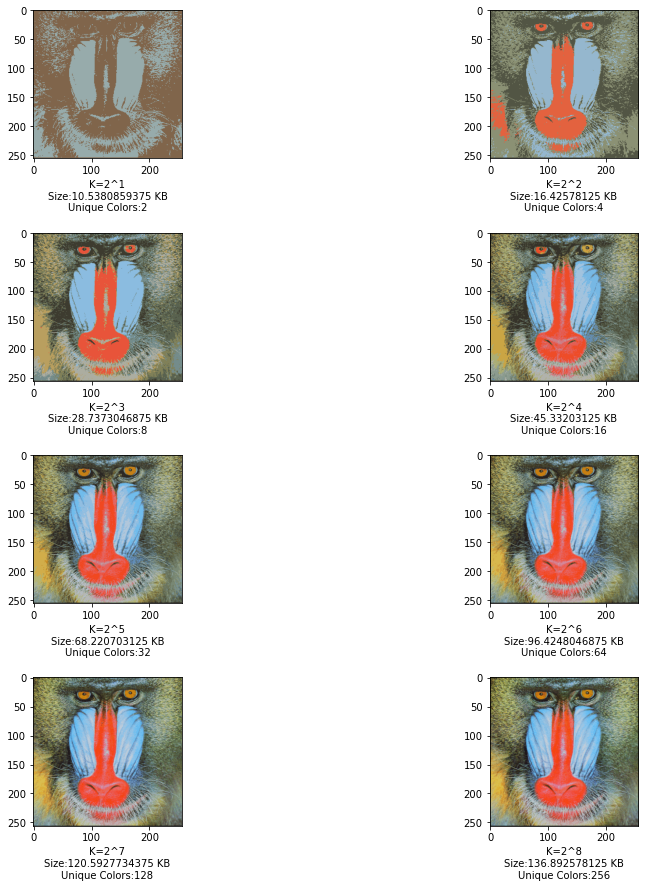

In [116]:
# displaying all different compressed image with total number of bytes and unique colors also color names in related cluster
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=.5)
my_size_img_baboon = []
my_color_img_baboon = []
my_color_name_baboon = []

for i in range(1,9):
    colors=[]
    kmeans = KMeans(n_clusters=2**i, n_init=5, max_iter=200,random_state=42)
    kmeans.fit(pixel_values_baboon)
    pixel_centroid = np.array([list(kmeans.cluster_centers_[label]) for label in kmeans.labels_])
    for color in (np.unique(pixel_centroid.reshape(-1, image_baboon.shape[2]),axis = 0)):
        color = color.astype(int)
        try:
            closest_name = webcolors.rgb_to_name(color)
        except ValueError:
            closest_name = closest_colour(color)
        colors.append(closest_name)
    pixel_centroid = pixel_centroid.astype("uint8")
    pixel_centroids_reshaped = np.reshape(pixel_centroid, (image_baboon.shape[0], image_baboon.shape[1], 3), "C")
    compressed_im = Image.fromarray(pixel_centroids_reshaped)
    plt.subplot(4,2,i)
    saved_img = cv.cvtColor(np.float32(compressed_im), cv.COLOR_BGR2RGB)
    #cv.imwrite("baboon"+str(i)+".png",saved_img)
    plt.imshow(compressed_im)
    plt.xlabel("K=2^"+str(i)+"\nSize:"+str(image_byte_size(compressed_im))+" KB"+"\n"+"Unique Colors:"+str(np.unique(pixel_centroid.reshape(-1, image_baboon.shape[2]), axis=0).shape[0]))
    print("2^"+str(i)+" -> "+str(colors))
    my_size_img_baboon.append(str(image_byte_size(compressed_im))+" KB")
    my_color_img_baboon.append(np.unique(pixel_centroid.reshape(-1, image_baboon.shape[2]), axis=0).shape[0])
    my_color_name_baboon.append(colors[:10])
plt.show()

In [117]:
# creating a table that includes several data about image
baboon_table = pd.DataFrame(index=["WCSS","BCSS","Explained Varaince","Image Size","Unique Colors","Name of the colors"],
                             data = [my_wcss_baboon,
                                     my_bcss_baboon,
                                     my_exp_var_baboon,
                                     my_size_img_baboon,
                                     my_color_img_baboon,
                                     my_color_name_baboon],
                             columns=["K=2^"+str(i) for i in range(1,9)])

In [118]:
baboon_table

,K=2^1,K=2^2,K=2^3,K=2^4,K=2^5,K=2^6,K=2^7,K=2^8
WCSS,3.03688e+08,1.23338e+08,6.32992e+07,3.43301e+07,1.93976e+07,1.18217e+07,7.4525e+06,4.71768e+06
BCSS,2.30212e+08,4.10523e+08,4.70984e+08,4.99957e+08,5.15008e+08,5.22351e+08,5.26791e+08,5.29582e+08
Explained Varaince,43.11896246134793%,76.89698307929612%,88.15249793480358%,93.57460469080291%,96.3702392354929%,97.78691589101037%,98.605035293476%,99.11703452837476%
Image Size,10.5380859375 KB,16.42578125 KB,28.7373046875 KB,45.33203125 KB,68.220703125 KB,96.4248046875 KB,120.5927734375 KB,136.892578125 KB
Unique Colors,2,4,8,16,32,64,128,256
Name of the colors,"[dimgray, darkgray]","[darkolivegreen, gray, lightsteelblue, tomato]","[darkslategray, dimgray, slategray, dimgray, s...","[darkslategray, darkolivegreen, dimgray, cadet...","[darkslategray, darkslategray, darkslategray, ...","[black, darkslategray, darkslategray, darkslat...","[black, darkslategray, darkslategray, darkslat...","[black, black, black, darkslategray, darkslate..."


In [119]:
#Converting data frame to excel file
#landscape_table.to_excel("landscape_table.xlsx")